<a href="https://colab.research.google.com/github/cuongle2002/AI-/blob/main/BTVNWEEK9(CIFAR100).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from keras.datasets import cifar100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
x_test.shape

(10000, 32, 32, 3)

In [8]:
y_test.shape

(10000, 1)

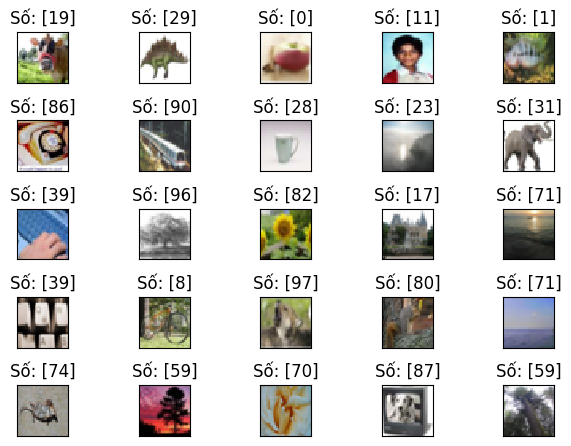

In [9]:
import matplotlib.pyplot as plt 
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap = "gray", interpolation = "none")
  plt.title("Số: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [10]:

from keras.models import Sequential
from keras.layers import Dense

model= Sequential()
model.add(Dense(512, input_shape = (32*32*3,), activation = 'relu'))
model.add(Dense(100,activation= 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               1573376   
                                                                 
 dense_3 (Dense)             (None, 100)               51300     
                                                                 
Total params: 1,624,676
Trainable params: 1,624,676
Non-trainable params: 0
_________________________________________________________________


In [11]:
X = x_test   # luu du lieu
Y = y_test    # luu du lieu

In [12]:
x_train = x_train.reshape(50000, 32*32*3)    # tuwf 60000 hangf thanh 1 hang, 28*28 thanh 1 cot, du lieu cua train
x_train = x_train.astype('float32')/255   # chuyen thanh kieu thuc tu 0 den 1
x_test = x_test.reshape(10000,32*32*3)       # du lieu cua test
x_test = x_test.astype('float32')/255

x_train.shape

(50000, 3072)

In [13]:
from keras.utils import to_categorical        # categorical chuyen 1 bit thanh n bits 
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

In [14]:
y_train.shape

(50000, 100)

In [15]:
y_test.shape

(10000, 100)

In [17]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 100, batch_size = 128)  ## Mỗi lần học chỉ 128 dữ liệu, không học hết 60000 dữ liệu , học tổng cộng 20 lần
test_loss, test_acc = model.evaluate(x_test, y_test) 
print("Mat mat: ", test_loss)
print("Do chinh xac: ", test_acc)

Epoch 1/100
391/391 [==============================] - 2s 4ms/step - loss: 3.2831 - accuracy: 0.2220
Epoch 2/100
391/391 [==============================] - 2s 4ms/step - loss: 3.2442 - accuracy: 0.2282
Epoch 3/100
391/391 [==============================] - 2s 5ms/step - loss: 3.2108 - accuracy: 0.2349
Epoch 4/100
391/391 [==============================] - 1s 4ms/step - loss: 3.1940 - accuracy: 0.2376
Epoch 5/100
391/391 [==============================] - 1s 4ms/step - loss: 3.1684 - accuracy: 0.2444
Epoch 6/100
391/391 [==============================] - 1s 4ms/step - loss: 3.1473 - accuracy: 0.2479
Epoch 7/100
391/391 [==============================] - 1s 4ms/step - loss: 3.1266 - accuracy: 0.2518
Epoch 8/100
391/391 [==============================] - 1s 4ms/step - loss: 3.1037 - accuracy: 0.2537
Epoch 9/100
391/391 [==============================] - 1s 4ms/step - loss: 3.0877 - accuracy: 0.2592
Epoch 10/100
391/391 [==============================] - 2s 4ms/step - loss: 3.0694 - accura

In [20]:
model.save("cifar100.h5")

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import matplotlib.pyplot as plt 
from keras.utils.image_utils import img_to_array
from keras.models import Sequential, load_model
from keras.utils import load_img
import numpy as np

1/1 [==============================] - 0s 87ms/step


array([32])

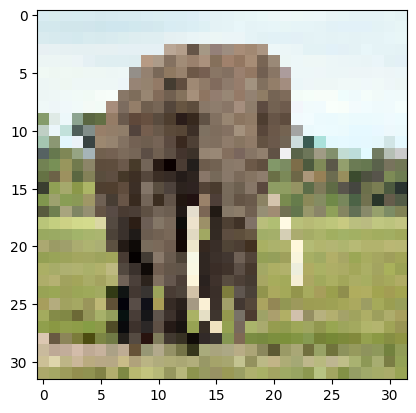

In [23]:
img = load_img('/50-hinh-anh-con-voi-de-thuong-dep-nhat-ma-ban-nen-biet_2.jpg',target_size = (32,32,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
model = load_model('/content/cifar100.h5')
np.argmax(model.predict(img), axis = -1)

1/1 [==============================] - 0s 190ms/step


array([82])

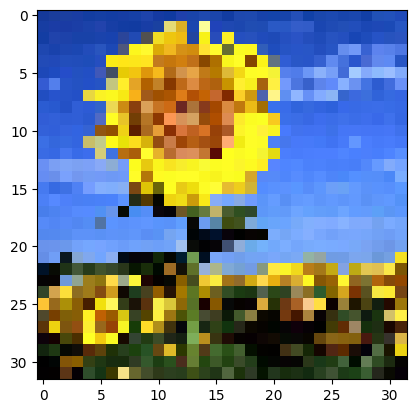

In [24]:
img = load_img('/nguon-goc-dac-diem-hoa-huong-duong.jpg',target_size = (32,32,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
model = load_model('/content/cifar100.h5')
np.argmax(model.predict(img), axis = -1)

1/1 [==============================] - 0s 40ms/step


array([36])

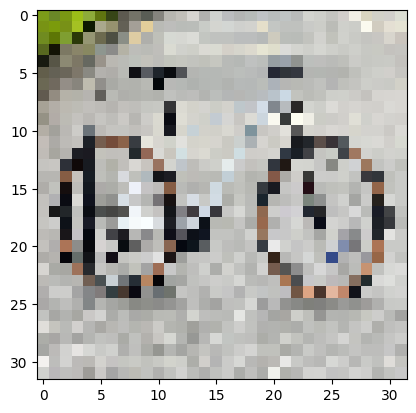

In [25]:
img = load_img('/xe-dap-california-800cc-12.jpg',target_size = (32,32,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
model = load_model('/content/cifar100.h5')
np.argmax(model.predict(img), axis = -1)

1/1 [==============================] - 0s 158ms/step


array([84])

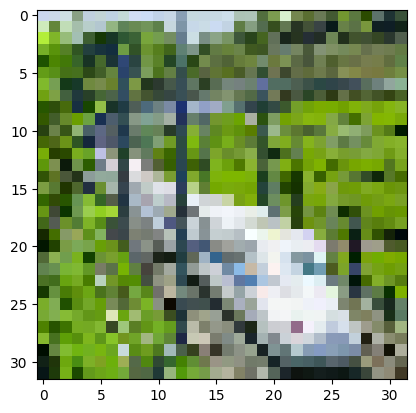

In [26]:
img = load_img('/tải xuống (2).jpg',target_size = (32,32,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
model = load_model('/content/cifar100.h5')
np.argmax(model.predict(img), axis = -1)